<a href="https://colab.research.google.com/github/pavanpranav/StartingWithPython-ai1-fall2019/blob/master/Copy_of_mnist_keras_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# taken from lukas/ml-class
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.callbacks import Callback
import json

# from wandb.keras import WandbCallback
# import wandb

# run = wandb.init()
# config = run.config






Using TensorFlow backend.


In [2]:
1+1

2

### hello world

1.one

2.two

3.three

- hello
- world
- portland 

hellor the $\alpha$ is a a greek letter.

$$\alpha + \beta + \gamma = \delta $$

In [3]:
a=(1,2)
type(a)

tuple

In [4]:
print(a)

(1, 2)


In [5]:
class Config:
  pass

config = Config()
config.optimizer = "adam"
config.epochs = 30
config.hidden_nodes = 30

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data() #returns two tuples
print(X_train.shape,y_train.shape)
img_width = X_train.shape[1]
img_height = X_train.shape[2]
print(X_train.shape, y_train.shape)
#X_train = X_train.astype('float32')
#X_train /= 255.
#X_test = X_test.astype('float32')
#X_test /= 255.

# Normalize, change learning rate, play with layer size, batchsize

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
labels = range(10)

num_classes = y_train.shape[1]

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,)
(60000, 28, 28) (60000,)


In [25]:
y_train[5]


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
# create model
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=config.optimizer,
              metrics=['accuracy'])
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [11]:

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=config.epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 159us/step - loss: 2.4184 - acc: 0.8493 - val_loss: 2.5620 - val_acc: 0.8405
Epoch 2/30
60000/60000 [==============================] - 10s 159us/step - loss: 2.4826 - acc: 0.8454 - val_loss: 2.4871 - val_acc: 0.8450
Epoch 3/30
60000/60000 [==============================] - 10s 161us/step - loss: 2.4569 - acc: 0.8471 - val_loss: 2.3989 - val_acc: 0.8509
Epoch 4/30
60000/60000 [==============================] - 10s 159us/step - loss: 2.4056 - acc: 0.8503 - val_loss: 2.4235 - val_acc: 0.8493
Epoch 5/30
60000/60000 [==============================] - 10s 162us/step - loss: 2.4246 - acc: 0.8491 - val_loss: 2.3797 - val_acc: 0.8517
Epoch 6/30
60000/60000 [==============================] - 10s 160us/step - loss: 2.4432 - acc: 0.8479 - val_loss: 2.5166 - val_acc: 0.8433
Epoch 7/30
60000/60000 [==============================] - 10s 161us/step - loss: 2.3954 - acc: 0.8510 - val_loss: 2.

In [0]:
import matplotlib.pyplot as plt 

In [0]:
a= np.arange(-10,10,0.001)
b=np.arange(-10,10,0.001)
c= lambda a,b: (a+b-2)**2

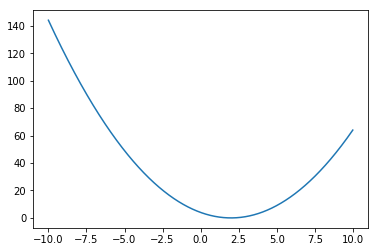

In [14]:
plt.plot(a,c(a,0))

In [15]:
history

In [0]:
epochs= history.epoch

In [17]:
type(history.history)

dict

In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
len(history.history["acc"])

30

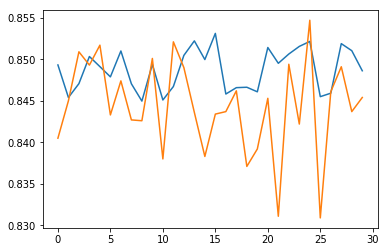

In [23]:
plt.plot(epochs,history.history["acc"])
plt.plot(epochs,history.history["val_acc"])
plt.show()